In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import csv
import math
import datetime

In [2]:
# parsivel raw data processing

names = np.array(['Date', 'Time', 'Intensity of precipitation (mm/h)',
               'Precipitation since start (mm)', 'Weather code SYNOP WaWa', 'Weather code METAR/SPECI',
               'Weather code NWS', 'Radar reflectivity (dBz)', 'MOR Visibility (m)',
               'Signal amplitude of Laserband', 'Number of detected particles', 'Temperature in sensor (ºC)',
               'Heating current (A)', 'Sensor voltage (V)', 'Optics status',
               'Kinetic Energy', 'Snow intensity (mm/h)'])
names = np.append(names, ['%.0f' % x for x in np.arange(1, 1025)])
names = np.append(names, ['</SPECTRUM>'])

# add .csv to original Parsivel data file 
file_name = ('2022-10-10-02-24')
df = pd.read_csv(file_name, sep=';', names=names, parse_dates=[['Date', 'Time']], index_col=['Date_Time'],
                 dayfirst=True, infer_datetime_format=True,na_values=[''])

# remove the repeating column names
# use .copy() to avoid warning of SettingWithCopy
# df = df.drop(df[df.iloc[:, 0] == df.iloc[0, 0]].index).copy()
try:
    df = df.drop(index='Date Time')
except:
    pass

# remove the last column
df = df.drop(['</SPECTRUM>'], axis=1)

# convert data type
df.index = pd.to_datetime(df.index).tz_localize('Asia/Taipei')
df.loc[:, names[2]] = df.loc[:, names[2]].astype(float) # Intensity of precipitation (mm/h)

# replace <SPECTRUM> with the value of first DSD cell
df.loc[:, '1'] = df.loc[df.loc[:, '1'] != '<SPECTRUM>ZERO</SPECTRUM>', '1'].str[10:]

# fill NaN with 0.0, convert '' to float
df.loc[:,:] = df.loc[:,:].fillna(0.0)
df.loc[:, '1'] = pd.to_numeric(df.loc[:, '1'])

# resample by 1min
df = df.resample('1T', label='right', closed='right').mean()
pd.set_option('display.max_columns',None)

df

C:\Users\88690\AppData\Local\Temp\ipykernel_6748\3513723352.py:14: DtypeWarning: Columns (1041) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, sep=';', names=names, parse_dates=[['Date', 'Time']], index_col=['Date_Time'],
C:\Users\88690\AppData\Local\Temp\ipykernel_6748\3513723352.py:37: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, '1'] = pd.to_numeric(df.loc[:, '1'])
C:\Users\88690\AppData\Local\Temp\ipykernel_6748\3513723352.py:40: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('1T', label

Intensity of precipitation (mm/h)  \
Date_Time                                                      
2022-10-10 02:24:00+08:00                                0.0   
2022-10-10 02:25:00+08:00                                0.0   
2022-10-10 02:26:00+08:00                                0.0   
2022-10-10 02:27:00+08:00                                0.0   
2022-10-10 02:28:00+08:00                                0.0   
...                                                      ...   
2022-11-15 22:23:00+08:00                                0.0   
2022-11-15 22:24:00+08:00                                0.0   
2022-11-15 22:25:00+08:00                                0.0   
2022-11-15 22:26:00+08:00                                0.0   
2022-11-15 22:27:00+08:00                                0.0   

                           Precipitation since start (mm)  \
Date_Time                                                   
2022-10-10 02:24:00+08:00                          176.48   
2022-10-10 02:25:00+08:00                          176.48   
2022-10-10 02:26:00+08:00                          176.48   
2022-10-10 02:27:00+08:00                          176.48   
2022-10-10 02:28:00+08:00                          176.48   
...                                                   ...   
2022-11-15 22:23:00+08:00                          200.55   
2022-11-15 22:24:00+08:00                          200.55   
2022-11-15 22:25:00+08:00                          200.55   
2022-11-15 22:26:00+08:00                          200.55   
2022-11-15 22:27:00+08:00                          200.55   

                           Weather code SYNOP WaWa  Radar reflectivity (dBz)  \
Date_Time                                                                      
2022-10-10 02:24:00+08:00                      0.0                    -9.999   
2022-10-10 02:25:00+08:00                      0.0                    -9.999   
2022-10-10 02:26:00+08:00                      0.0                    -9.999   
2022-10-10 02:27:00+08:00                      0.0                    -9.999   
2022-10-10 02:28:00+08:00                      0.0                    -9.999   
...                                            ...                       ...   
2022-11-15 22:23:00+08:00                      0.0                    -9.999   
2022-11-15 22:24:00+08:00                      0.0                    -9.999   
2022-11-15 22:25:00+08:00                      0.0                    -9.999   
2022-11-15 22:26:00+08:00                      0.0                    -9.999   
2022-11-15 22:27:00+08:00                      0.0                    -9.999   

                           MOR Visibility (m)  Signal amplitude of Laserband  \
Date_Time                                                                      
2022-10-10 02:24:00+08:00             20000.0                   17327.000000   
2022-10-10 02:25:00+08:00             20000.0                   17325.166667   
2022-10-10 02:26:00+08:00             20000.0                   17279.833333   
2022-10-10 02:27:00+08:00             20000.0                   17377.833333   
2022-10-10 02:28:00+08:00             20000.0                   17444.666667   
...                                       ...                            ...   
2022-11-15 22:23:00+08:00             20000.0                   14655.333333   
2022-11-15 22:24:00+08:00             20000.0                   14672.166667   
2022-11-15 22:25:00+08:00             20000.0                   14545.166667   
2022-11-15 22:26:00+08:00             20000.0                   14570.166667   
2022-11-15 22:27:00+08:00             20000.0                   14595.666667   

                           Number of detected particles  \
Date_Time                                                 
2022-10-10 02:24:00+08:00                           0.0   
2022-10-10 02:25:00+08:00                           0.0   
2022-10-10 02:26:00+08:00                           0.0   
2022-10-10 02:27:00+08:

In [77]:
df = df.shift(-8, freq='H')
df

Intensity of precipitation (mm/h)  \
Date_Time                                                      
2022-10-09 18:24:00+08:00                                0.0   
2022-10-09 18:25:00+08:00                                0.0   
2022-10-09 18:26:00+08:00                                0.0   
2022-10-09 18:27:00+08:00                                0.0   
2022-10-09 18:28:00+08:00                                0.0   
...                                                      ...   
2022-11-15 14:23:00+08:00                                0.0   
2022-11-15 14:24:00+08:00                                0.0   
2022-11-15 14:25:00+08:00                                0.0   
2022-11-15 14:26:00+08:00                                0.0   
2022-11-15 14:27:00+08:00                                0.0   

                           Precipitation since start (mm)  \
Date_Time                                                   
2022-10-09 18:24:00+08:00                          176.48   
2022-10-09 18:25:00+08:00                          176.48   
2022-10-09 18:26:00+08:00                          176.48   
2022-10-09 18:27:00+08:00                          176.48   
2022-10-09 18:28:00+08:00                          176.48   
...                                                   ...   
2022-11-15 14:23:00+08:00                          200.55   
2022-11-15 14:24:00+08:00                          200.55   
2022-11-15 14:25:00+08:00                          200.55   
2022-11-15 14:26:00+08:00                          200.55   
2022-11-15 14:27:00+08:00                          200.55   

                           Weather code SYNOP WaWa  Radar reflectivity (dBz)  \
Date_Time                                                                      
2022-10-09 18:24:00+08:00                      0.0                    -9.999   
2022-10-09 18:25:00+08:00                      0.0                    -9.999   
2022-10-09 18:26:00+08:00                      0.0                    -9.999   
2022-10-09 18:27:00+08:00                      0.0                    -9.999   
2022-10-09 18:28:00+08:00                      0.0                    -9.999   
...                                            ...                       ...   
2022-11-15 14:23:00+08:00                      0.0                    -9.999   
2022-11-15 14:24:00+08:00                      0.0                    -9.999   
2022-11-15 14:25:00+08:00                      0.0                    -9.999   
2022-11-15 14:26:00+08:00                      0.0                    -9.999   
2022-11-15 14:27:00+08:00                      0.0                    -9.999   

                           MOR Visibility (m)  Signal amplitude of Laserband  \
Date_Time                                                                      
2022-10-09 18:24:00+08:00             20000.0                   17327.000000   
2022-10-09 18:25:00+08:00             20000.0                   17325.166667   
2022-10-09 18:26:00+08:00             20000.0                   17279.833333   
2022-10-09 18:27:00+08:00             20000.0                   17377.833333   
2022-10-09 18:28:00+08:00             20000.0                   17444.666667   
...                                       ...                            ...   
2022-11-15 14:23:00+08:00             20000.0                   14655.333333   
2022-11-15 14:24:00+08:00             20000.0                   14672.166667   
2022-11-15 14:25:00+08:00             20000.0                   14545.166667   
2022-11-15 14:26:00+08:00             20000.0                   14570.166667   
2022-11-15 14:27:00+08:00             20000.0                   14595.666667   

                           Number of detected particles  \
Date_Time                                                 
2022-10-09 18:24:00+08:00                           0.0   
2022-10-09 18:25:00+08:00                           0.0   
2022-10-09 18:26:00+08:00                           0.0   
2022-10-09 18:27:00+08:

In [73]:
# pluvioS = pd.read_csv('2023-07-07-13-58_pluvioS.csv', skiprows=3)
pluvioL = pd.read_csv('Nalgae_pluvioL.csv', skiprows=3)
pluvioL["_value"] = pd.to_numeric(pluvioL["_value"], errors='coerce')
pluvioL["_time"] = pd.to_datetime(pluvioL["_time"], format='%Y-%m-%d'+'T'+'%H:%M:%S'+'Z', errors='coerce')
pluvioL = pluvioL.set_index("_time")
pluvioL = pluvioL.tz_localize('Asia/Taipei')
pluvioL

,Unnamed: 0,result,table,_start,_stop,_value,_field,_measurement
_time,,,,,,,,
2022-10-26 19:01:00+08:00,NaN,NaN,0,2022-10-26T19:00:00Z,2022-11-02T17:45:00Z,0.0,mm/h,RT Intensity
2022-10-26 19:02:00+08:00,NaN,NaN,0,2022-10-26T19:00:00Z,2022-11-02T17:45:00Z,0.0,mm/h,RT Intensity
2022-10-26 19:03:00+08:00,NaN,NaN,0,2022-10-26T19:00:00Z,2022-11-02T17:45:00Z,0.0,mm/h,RT Intensity
2022-10-26 19:04:00+08:00,NaN,NaN,0,2022-10-26T19:00:00Z,2022-11-02T17:45:00Z,0.0,mm/h,RT Intensity
2022-10-26 19:05:00+08:00,NaN,NaN,0,2022-10-26T19:00:00Z,2022-11-02T17:45:00Z,0.0,mm/h,RT Intensity
...,...,...,...,...,...,...,...,...
2022-11-02 17:41:00+08:00,NaN,NaN,0,2022-10-26T19:00:00Z,2022-11-02T17:45:00Z,0.0,mm/h,RT Intensity
2022-11-02 17:42:00+08:00,NaN,NaN,0,2022-10-26T19:00:00Z,2022-11-02T17:45:00Z,0.0,mm/h,RT Intensity
2022-11-02 17:43:00+08:00,NaN,NaN,0,2022-10-26T19:00:00Z,2022-11-02T17:45:00Z,0.0,mm/h,RT Intensity


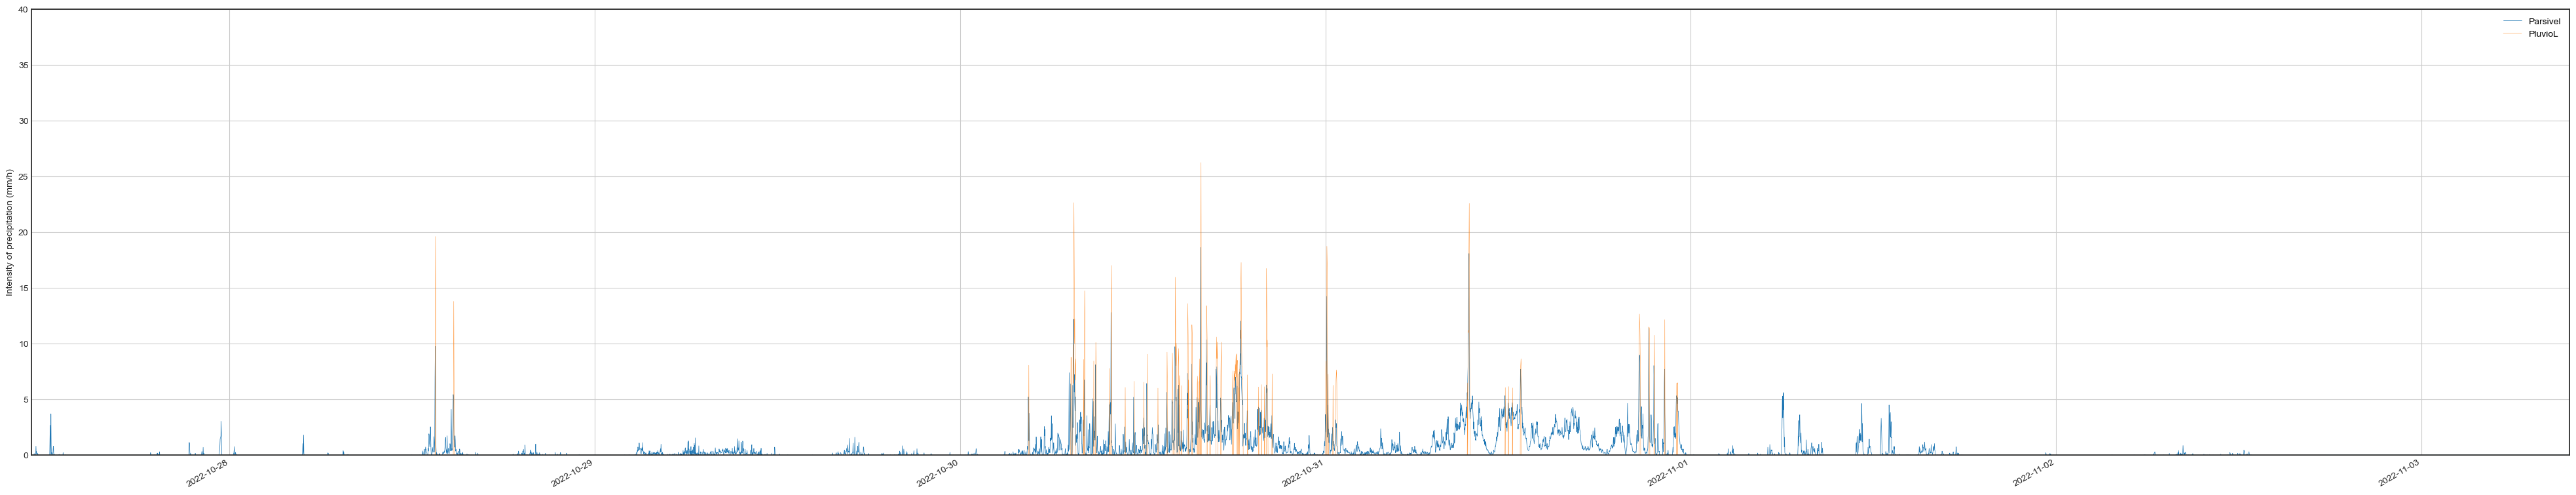

In [78]:
plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(50,10))
intensity = df["Intensity of precipitation (mm/h)"]
Parsivel_intensity = plt.plot(intensity, linewidth = 0.5, label="Parsivel")
# PluvioS_intensity = plt.plot(pluvioS["_time"], pluvioS["_value"], linewidth = 0.3, label="PluvioS")
PluvioL_intensity = plt.plot(pluvioL["_value"], linewidth = 0.3, label="PluvioL")
plt.gcf().autofmt_xdate()
plt.ylabel("Intensity of precipitation (mm/h)")
plt.legend(labelcolor="black")
plt.grid(True)
plt.xlim([datetime.datetime(2022, 10, 27, 3, 0, 0), 
           datetime.datetime(2022, 11, 3, 1, 45,0)])
plt.ylim(0, 40)

plt.show()

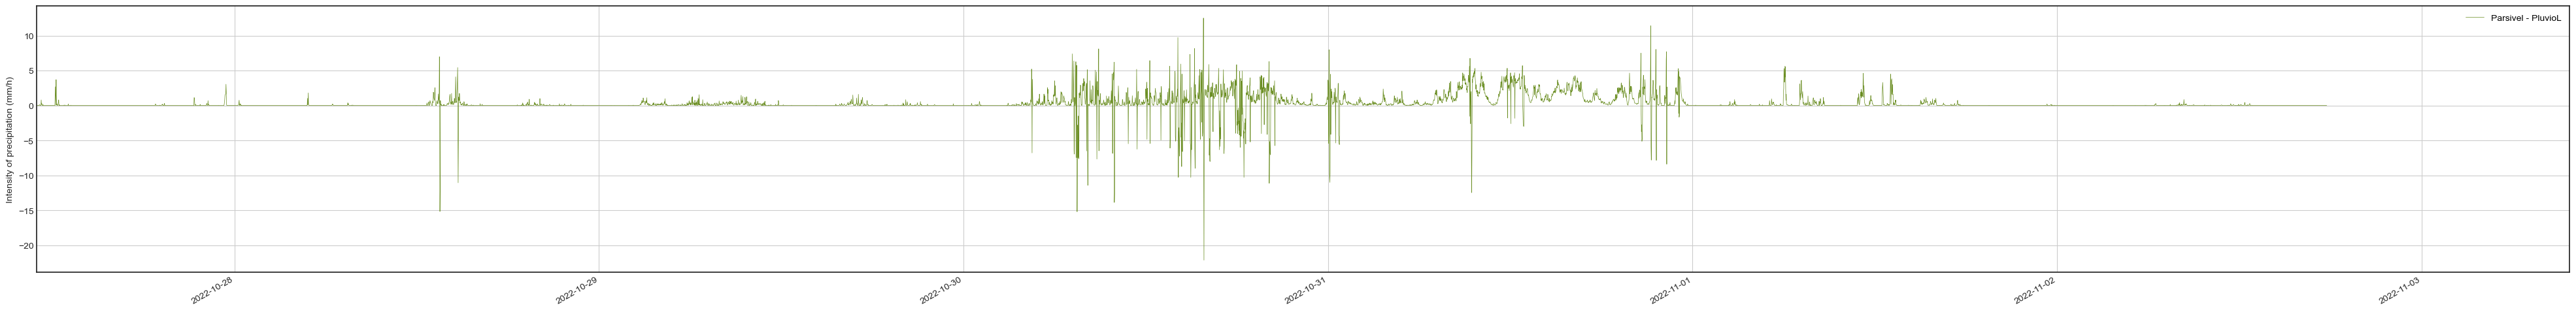

In [79]:
plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(50,6))

diff = intensity-pluvioL["_value"]
difference = plt.plot(diff, linewidth = 0.5, label="Parsivel - PluvioL", color = 'olivedrab')

plt.gcf().autofmt_xdate()
plt.ylabel("Intensity of precipitation (mm/h)")
plt.legend(labelcolor="black")
plt.grid(True)
plt.xlim([datetime.datetime(2022, 10, 27, 3, 0, 0), 
           datetime.datetime(2022, 11, 3, 1, 45,0)])

plt.show()

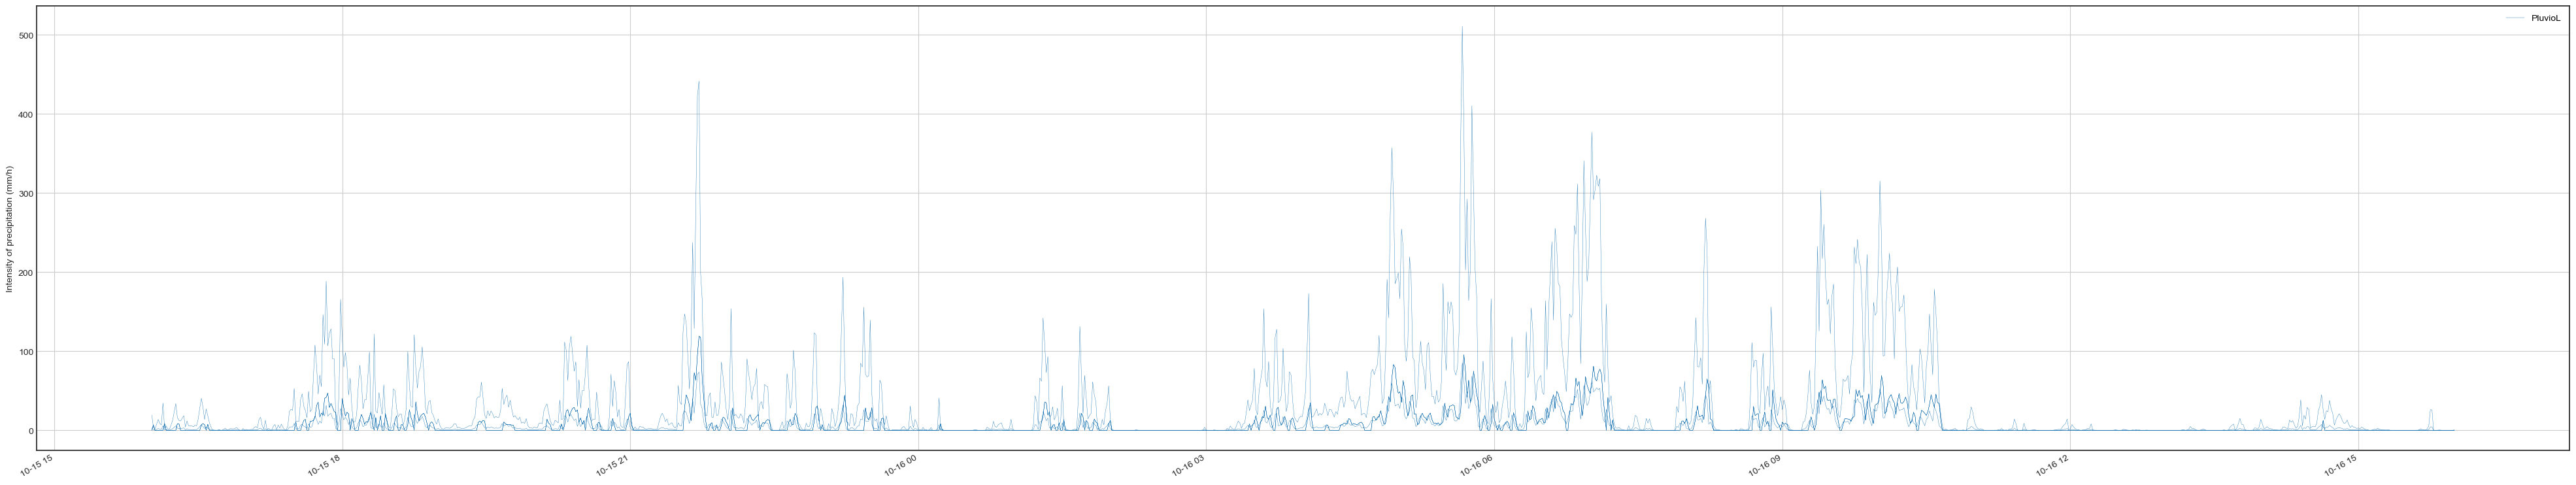

In [62]:
# extract data from certain time period
start_time = "2022-10-15 16:00:00+08:00"
# start_time = "2022-10-30 15:00:00"
end_time = "2022-10-16 16:00:00+08:00"
# end_time = "2022-10-30 16:00:00"
# filt = (data["Date_Time"] >= start_time) & (data["Date_Time"] <= end_time)
# data = data.loc[filt]

# tranfrom data into 32x32 matrix
# array = np.array(df)
# array = np.asarray(np.sum(array[:, 14:1038], axis=0), dtype=int)
# mat = np.flip(array.reshape(32, 32), 0)

# plot intensity
# data["Date_Time"] = pd.to_datetime(data["Date_Time"],  format='%Y-%m-%d %H:%M:%S')
# pluvioS["_time"] = pd.to_datetime(pluvioS["_time"], format='%Y-%m-%d'+'T'+'%H:%M:%S'+'Z')
# Convert valid datetime values to datetime format, and handle invalid values with NaT



# time = data["Date_Time"]
#intensity = df["Intensity of precipitation (mm/h)"]
plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(50,10))
# Parsivel_intensity = plt.plot(intensity, linewidth = 0.5, label="Parsivel")
# PluvioS_intensity = plt.plot(pluvioS["_time"], pluvioS["_value"], linewidth = 0.3, label="PluvioS")
PluvioL_intensity = plt.plot(pluvioL["_value"], linewidth = 0.3, label="PluvioL")
plt.gcf().autofmt_xdate()
plt.ylabel("Intensity of precipitation (mm/h)")
plt.legend(labelcolor="black")
plt.grid(True)
# plt.xlim([datetime.datetime(2022, 10, 16, 0, 0, 0), 
#           datetime.datetime(2022, 10, 17, 0, 0,0)])
# plt.ylim(0, 150)

plt.show()

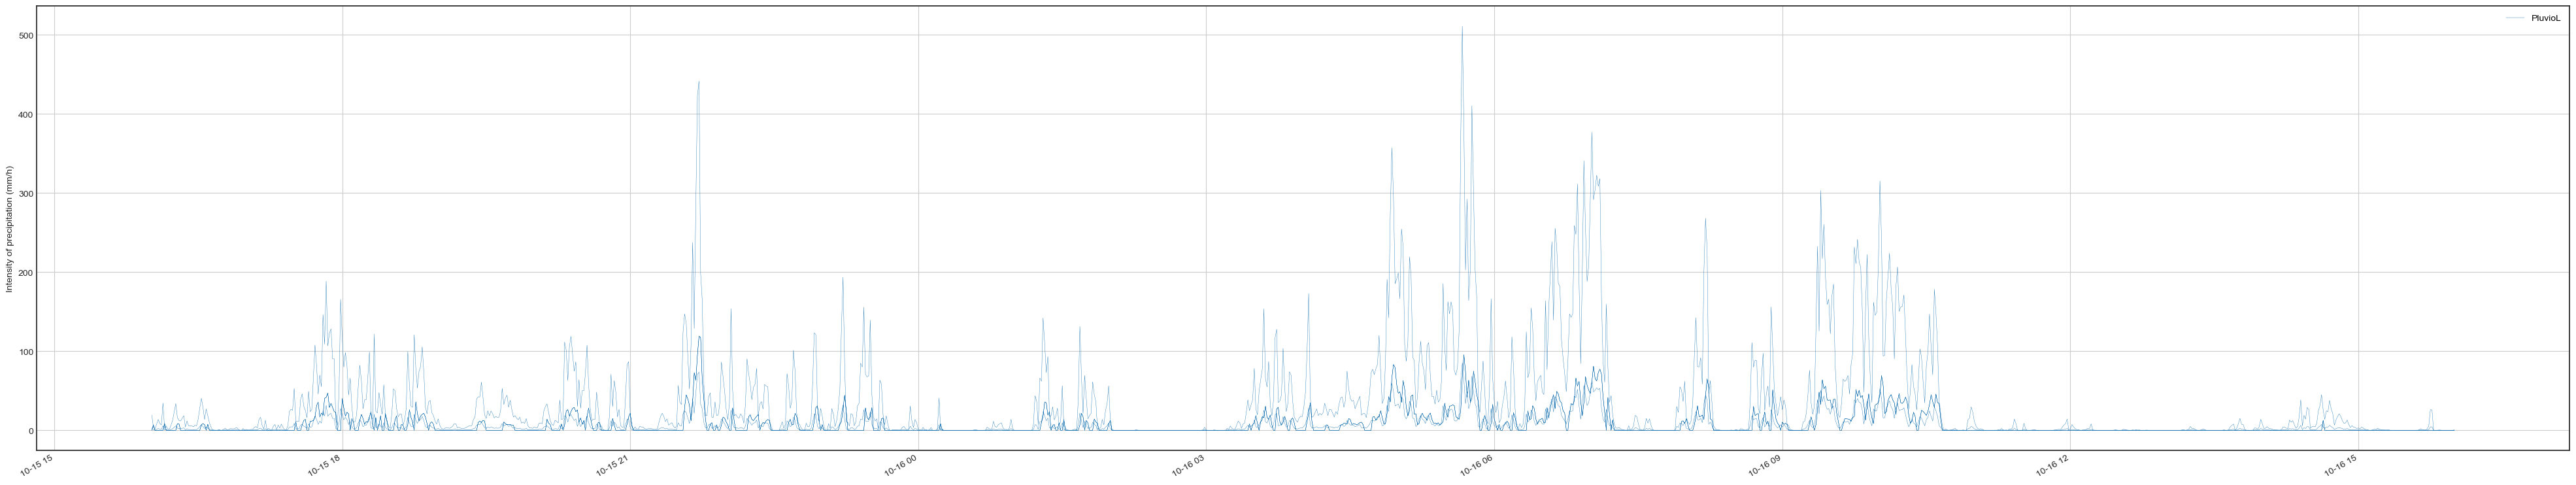

In [63]:
plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(50,10))
PluvioL_intensity = plt.plot(pluvioL["_value"], linewidth = 0.3, label="PluvioL")
plt.gcf().autofmt_xdate()
plt.ylabel("Intensity of precipitation (mm/h)")
plt.legend(labelcolor="black")
plt.grid(True)

plt.show()

In [8]:
# particle speed and diameter class
speed_class = [0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,1.1,1.3,1.5,1.7,1.9,
       2.2,2.6,3.0,3.4,3.8,4.4,5.2,6.0,6.8,7.6,8.8,10.4,12.0,13.6,15.2,17.6,20.8]
diameter_class = [0.062,0.187,0.312,0.437,0.562,0.687,0.812,0.937,1.062,1.187,1.375,1.625,1.875,2.125,2.375,
                2.750,3.250,3.750,4.250,4.750,5.500,6.500,7.500,8.500,9.500,11.000,13.000,15.000,17.000,19.000,21.500,24.500]

# write parsivel data by number of particles into csv file
with open("data.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)

    for i in range(0, 32):
        for j in range(0, 32):
            value = mat[i][j]

            for _ in range(value):
                writer.writerow([diameter_class[j], speed_class[31 - i]])

particles = pd.read_csv("data.csv", names=["diameter", "velocity"])

In [9]:
drop = pd.DataFrame()

# 循环遍历矩阵的每个元素
for i in range(32):
    for j in range(32):
        # 获取矩阵元素的值
        value = mat[i][j]

        # 根据值重复构建直径和速度的数据列表
        diameter_list = [diameter_class[j]] * value
        speed_list = [speed_class[31-i]] * value

        # 将直径和速度的数据列表添加到DataFrame
        temp_drop = pd.DataFrame({'diameter': diameter_list, 'velocity': speed_list})

        # 将临时DataFrame添加到主DataFrame
        drop = pd.concat([drop, temp_drop], ignore_index=True)

# 打印输出DataFrame
print(drop)

         diameter  velocity
0           1.062      8.80
1           1.875      8.80
2           2.375      8.80
3           2.750      8.80
4           3.250      8.80
...           ...       ...
1227719     0.937      0.05
1227720     0.937      0.05
1227721     0.937      0.05
1227722     0.937      0.05
1227723     0.937      0.05

[1227724 rows x 2 columns]


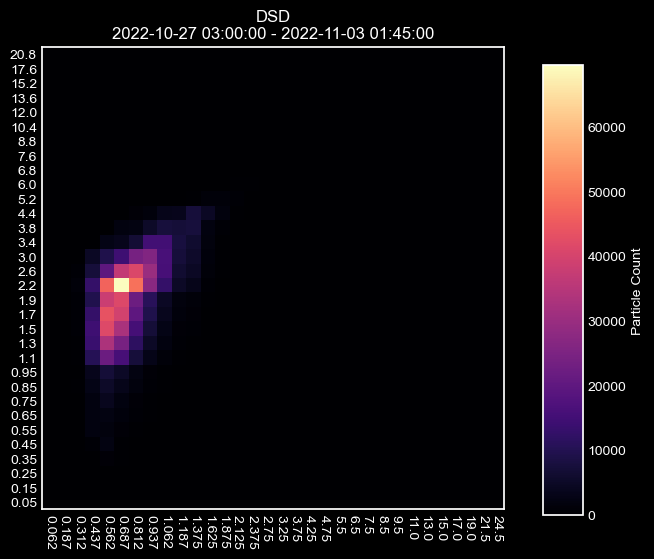

C:\Users\88690\AppData\Local\Temp\ipykernel_30172\1911277695.py:24: RuntimeWarning: divide by zero encountered in log2
  plt.imshow(np.log2(mat), cmap="magma", interpolation="none")


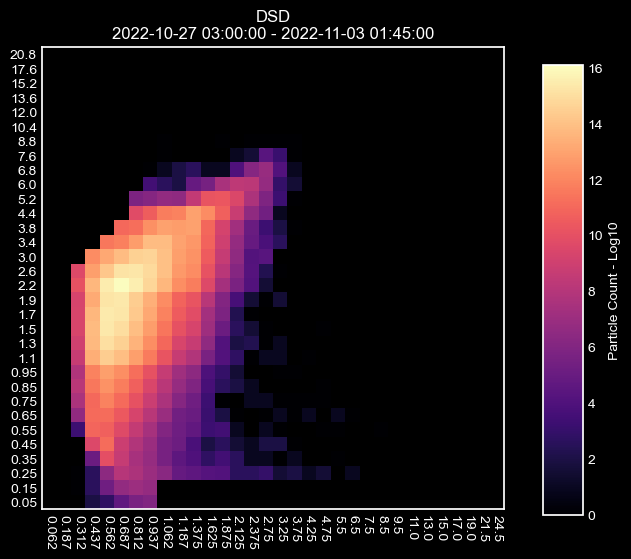

In [33]:
wt_mat = np.zeros([32, 1], float)
for i in range(0, 32):
    for j in range(0, 32):
        wt_mat[i] += mat[j][i] * speed_class[31 - j]
    if wt_mat[i] != 0.0:
        wt_mat[i] /= np.sum(mat, axis=0)[i]

# mat = mat.astype(float)
plt.figure(figsize=(8, 6))
plt.imshow(mat, cmap="magma", interpolation="none")
title = "DSD" + "\n" + start_time + " - " + end_time
plt.title(title)
plt.xticks(np.arange(0, 32, 1), np.array(diameter_class), rotation=270)
plt.yticks(np.arange(0, 32, 1), np.flipud(np.array(speed_class)))
plt.grid(False)
cax = plt.axes([0.85, 0.1, 0.05, 0.75])
plt.style.use("dark_background")
plt.colorbar(cax=cax)
plt.ylabel("Particle Count")
plt.show()

# mat[mat <= 0] = 1
plt.figure(figsize=(8, 6))
plt.imshow(np.log2(mat), cmap="magma", interpolation="none")
plt.title(title)
plt.xticks(np.arange(0, 32, 1), np.array(diameter_class), rotation=270)
plt.yticks(np.arange(0, 32, 1), np.flipud(np.array(speed_class)))
plt.grid(False)
cax = plt.axes([0.85, 0.1, 0.05, 0.75])
plt.colorbar(cax=cax)
plt.ylabel("Particle Count - Log10")
plt.show()

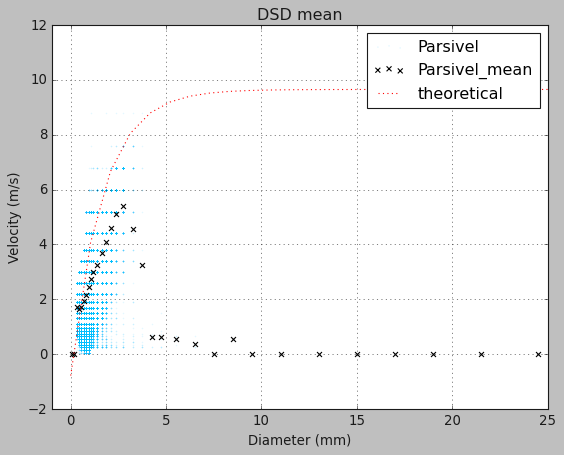

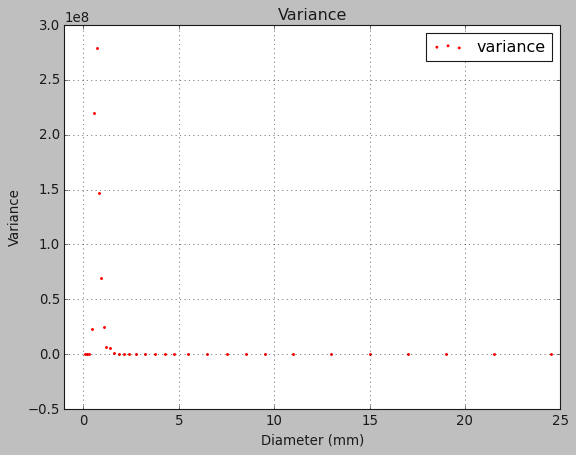

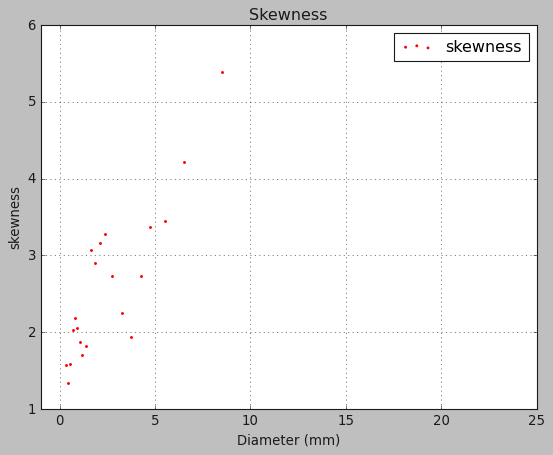

time period =  2022-10-27 03:00:00  -  2022-11-03 01:45:00
mse =  3.952068064213726
rmse =  1.9879809013704648


In [67]:
from scipy.stats import skew

drop_speed = wt_mat.flatten()

x = np.linspace(0, 25, 25)
y = 9.65 - 10.43 * np.exp(-0.6 * x)
y1 = 9.65 - 10.43 * np.exp(-0.6 * diameter_class[:][1])

plt.style.use("classic")


# add parsivel data
parsivel = plt.scatter(
    drop["diameter"],
    drop["velocity"],
    color="deepskyblue",
    marker=".",
    s=0.01,
    label="Parsivel",
    alpha=1,
)
parsivel_mean = plt.scatter(
    diameter_class, drop_speed, color="black", marker="x", s=20, label="Parsivel_mean"
)
# add theoretical DSD curve
theoretical = plt.plot(x, y, label="theoretical", color="red", linestyle="dotted")

plt.legend(labelcolor="black")
plt.title("DSD mean")
plt.xlabel("Diameter (mm)")
plt.ylabel("Velocity (m/s)")
plt.grid(True)
plt.xlim(-1, 25)
plt.show()

# add variance
var = np.var(mat, axis=0)
variance = plt.scatter(
    diameter_class, var, color="red", marker=".", s=10, label="variance"
)

plt.legend(labelcolor="black")
plt.title("Variance")
plt.xlabel("Diameter (mm)")
plt.ylabel("Variance")
plt.grid(True)
plt.xlim(-1, 25)
plt.show()

# add skewness
skew = skew(mat, axis=0)
skewness = plt.scatter(
    diameter_class, skew, color="red", marker=".", s=10, label="skewness"
)

plt.legend(labelcolor="black")
plt.title("Skewness")
plt.xlabel("Diameter (mm)")
plt.ylabel("skewness")
plt.grid(True)
plt.xlim(-1, 25)
plt.show()


def mse(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual, pred)).mean()


def rmse(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.sqrt(np.square(np.subtract(actual, pred)).mean())


print("time period = ", start_time, " - ", end_time)
print("mse = ", mse(y1, drop["velocity"]))
print("rmse = ", rmse(y1, drop["velocity"]))

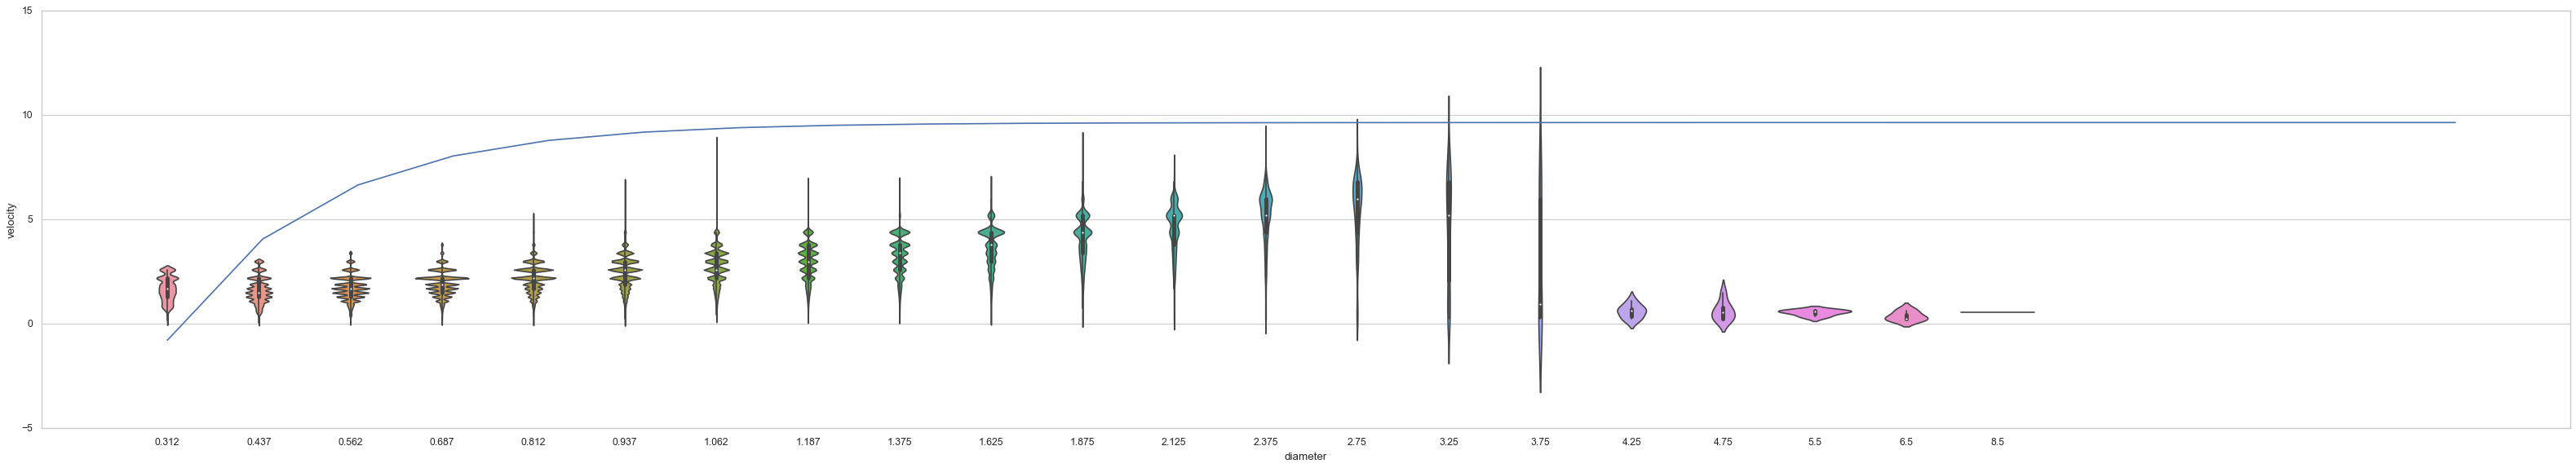

In [63]:
# violinplot
sns.set(rc={"figure.figsize": (50, 8)})
sns.set_style("whitegrid")
sns.violinplot(x=drop["diameter"], y=drop["velocity"])
theoretical2 = sns.lineplot(x=x, y=y)